**This notebook loads Argo profile pairs co-located with tropical cyclones and make plots to explore what happens to the upper ocean as the tropical cyclone passes over the ocean. A profile pair comprises one profile before the cyclone, one after. Pairs are co-located using Hu et al, 2021 (using the same code as in Sala et al, 2021).**

Import statements

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Settings/parameters to use

In [2]:
# set pressure axis for the profiles in the input file
pres     = np.arange(10,212,2)
# set pressure limits for the plots
pres_lim = [10,200]

# file to use (pairs for different ocean properties are stored in different files)
fname = "/Users/dgiglio/Work/DATA/TC_proj_JS_Salinity2020/bgc_TCpairs/HurricaneAdjRawVariableDF_Chla.pkl"
# set the label for the variable in the input file
var_lab = 'Chlorophyll a, mg/m3'

Read in the data and check what is in the dataframe. **Question for Jacopo: which variable is the time difference between the two profiles?**

In [3]:
df = pd.read_pickle(fname)
df.reset_index(drop=True);
df.keys()

Index(['before_pid', 'before_t', 'after_pid', 'after_t', 'angle', 'wind',
       'proj_t', 'sign', 'argo_lat', 'argo_lon', 'HurricaneID', 'profile_dt',
       'hurricane_dt', 'signed_angle', 'adj_before_variable',
       'adj_after_variable', 'raw_before_variable', 'raw_after_variable',
       'standard_signed_angle', 'hurricane_dtd', 'profile_dtd',
       'hurricane_id'],
      dtype='object')

Store some of the variables in the dataframe, to use in the notebook.

In [4]:
raw_before_data = df.raw_before_variable.reset_index(drop=True)
raw_after_data  = df.raw_after_variable.reset_index(drop=True)
HurricaneID     = df.HurricaneID.reset_index(drop=True)
TC_wind         = df.wind.reset_index(drop=True)

**Plot all the pairs, one per figure. For each pair, also save the difference between the profiles after the TC and the profile before. Let's also save the pressure at which we see a max and the value of the max both before and after the cyclone.**

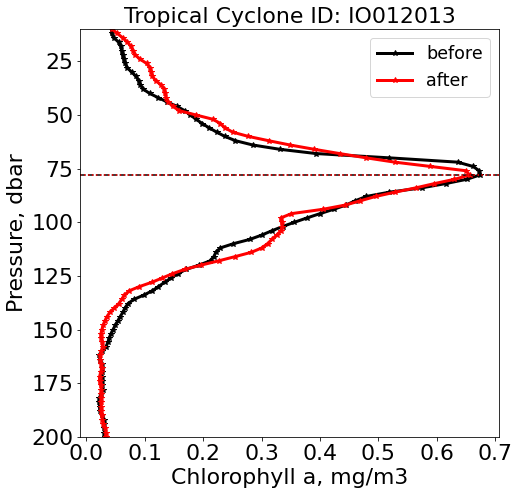

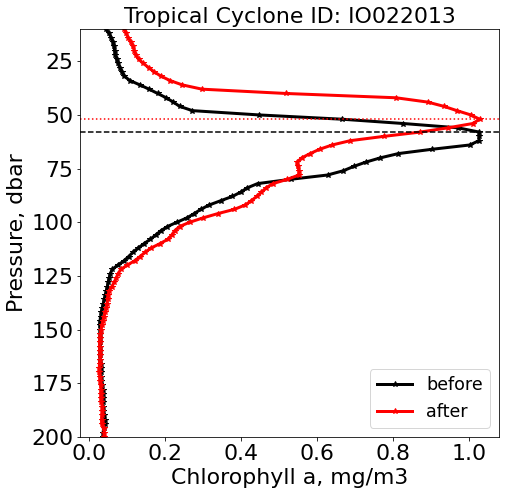

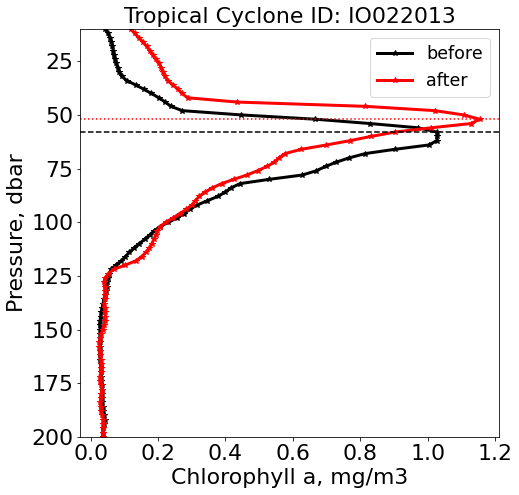

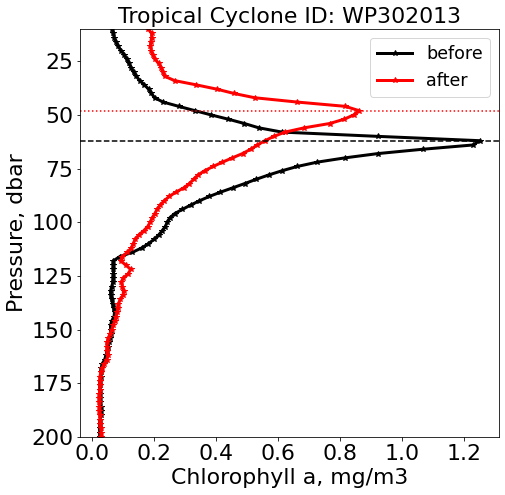

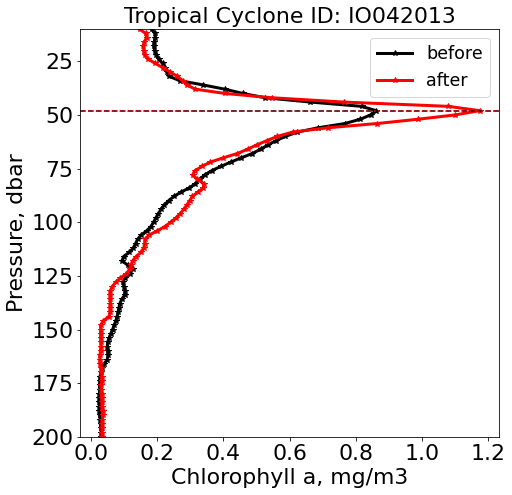

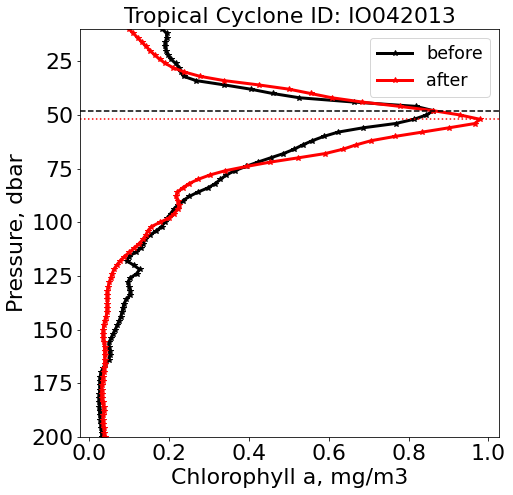

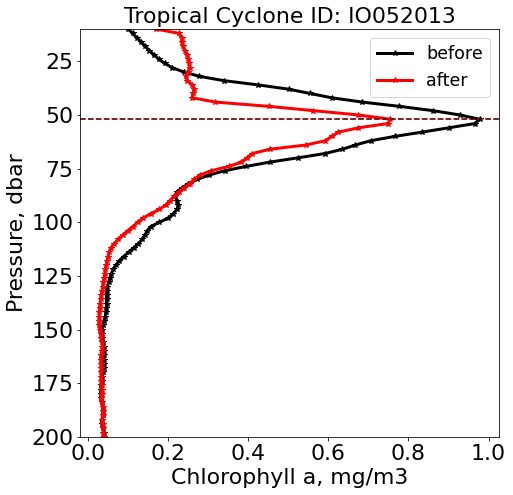

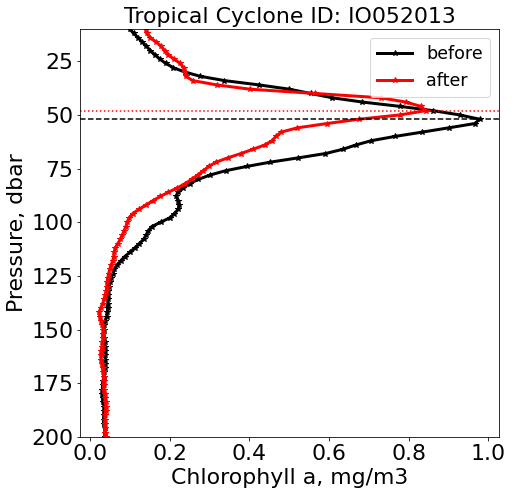

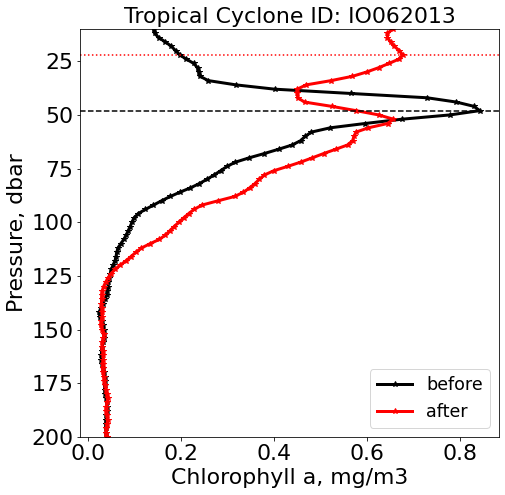

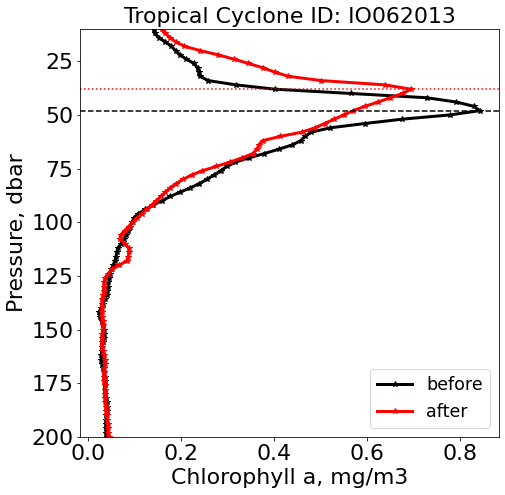

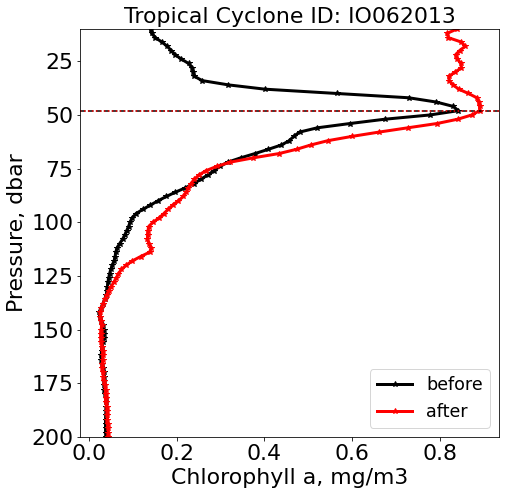

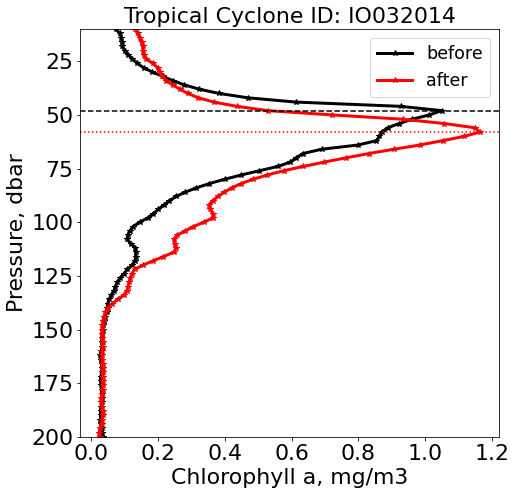

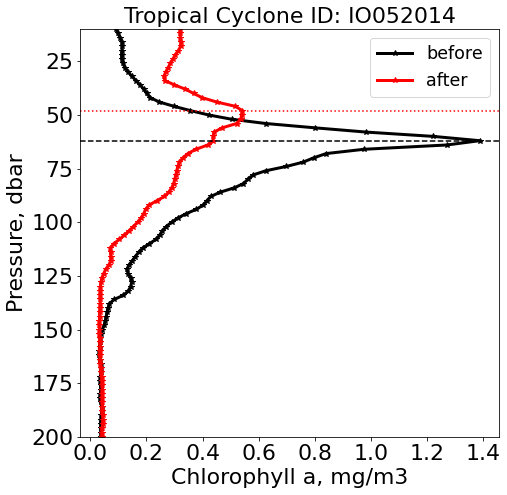

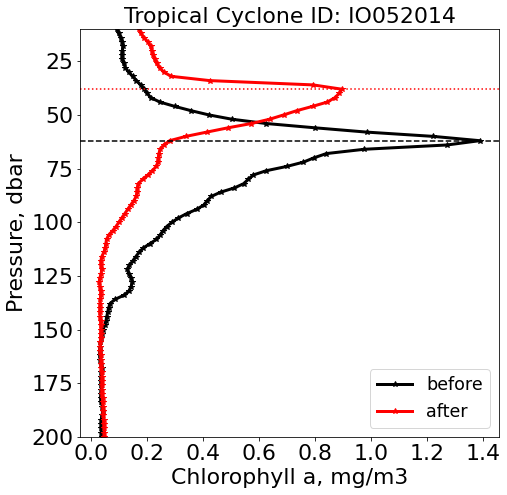

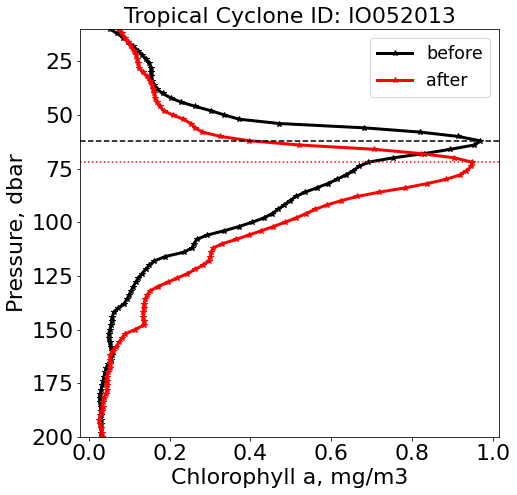

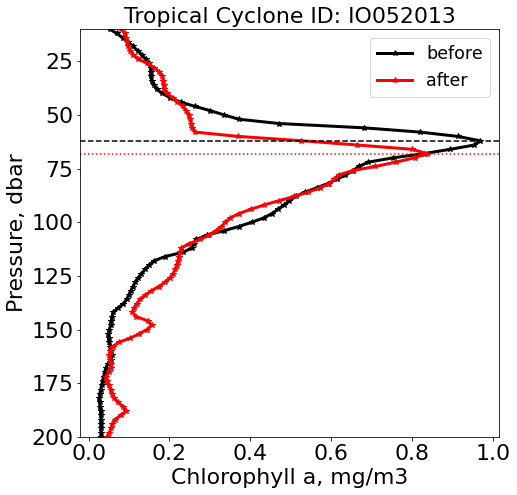

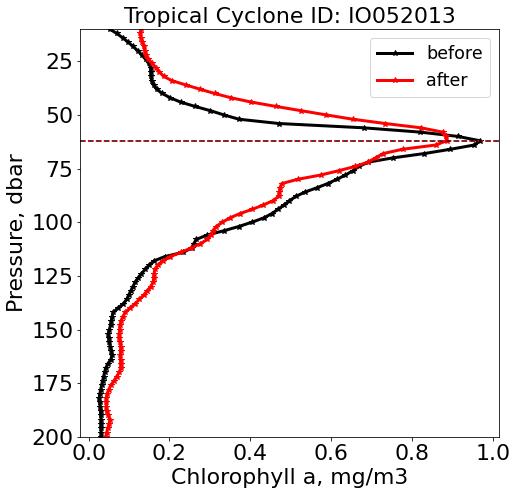

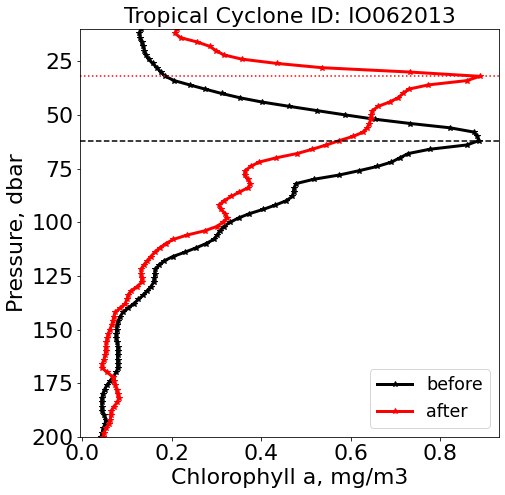

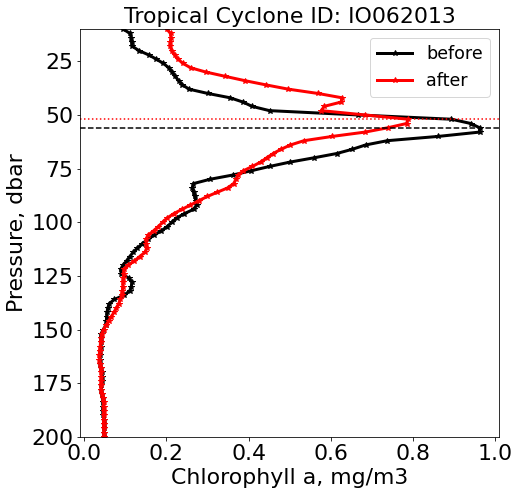

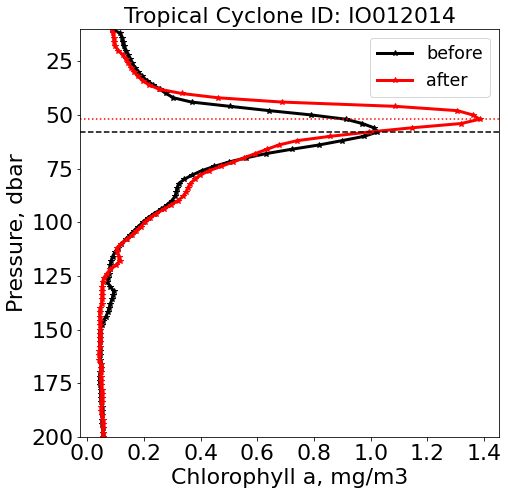

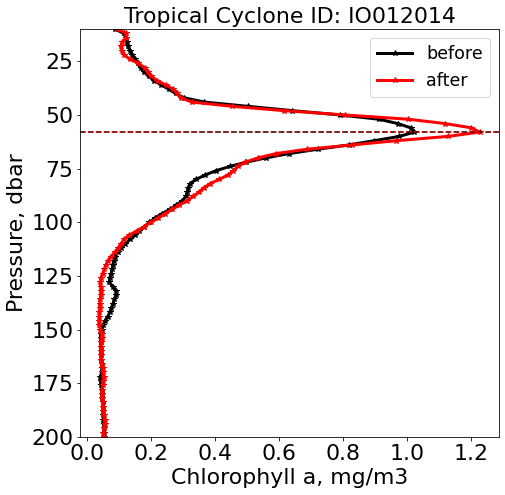

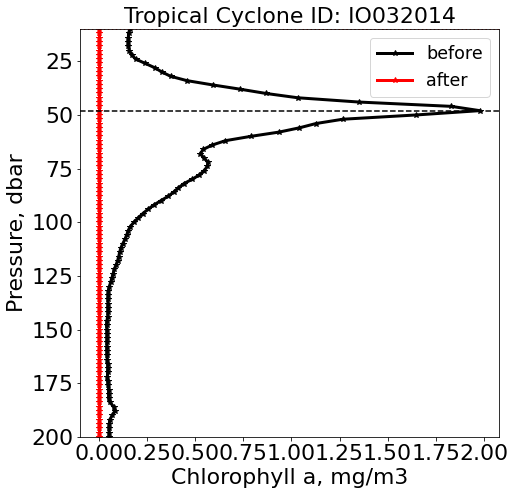

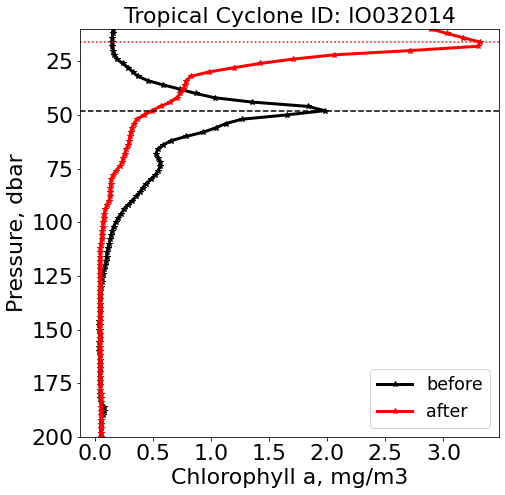

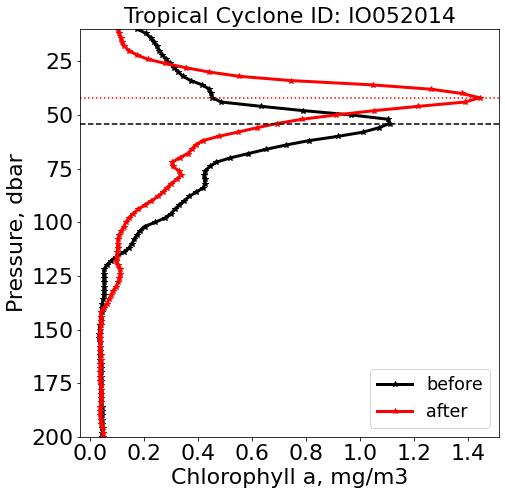

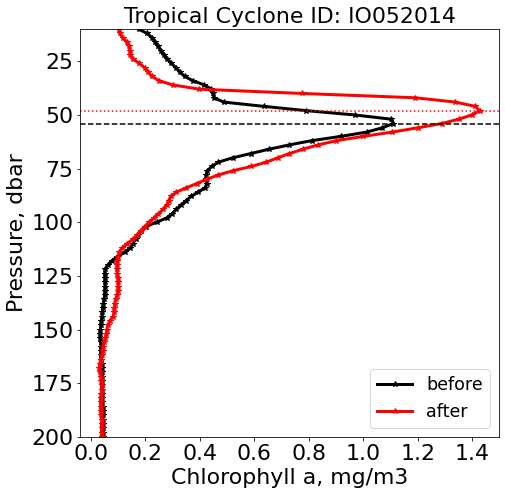

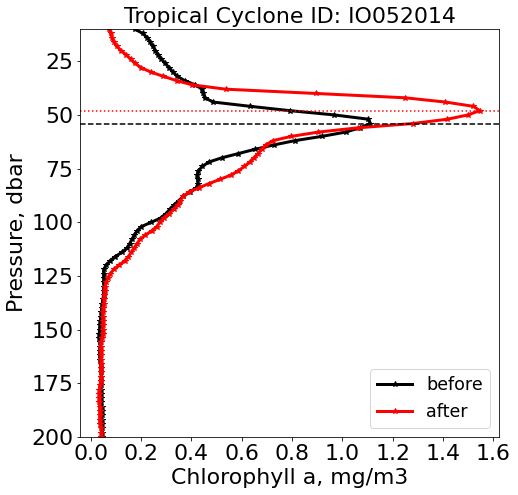

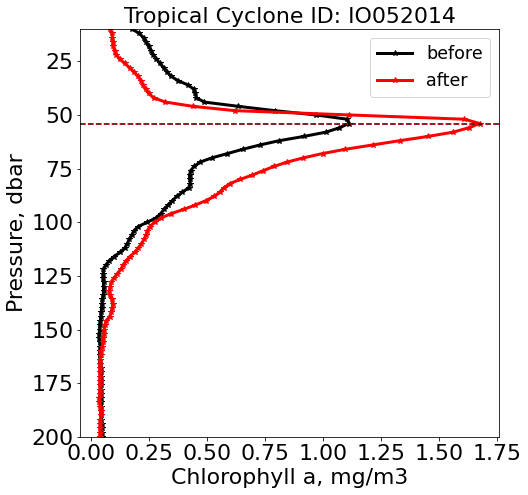

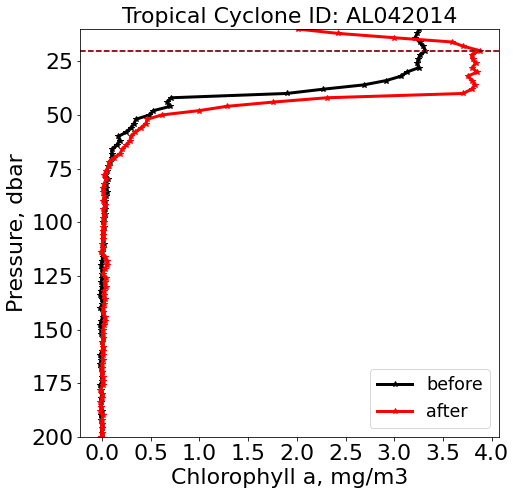

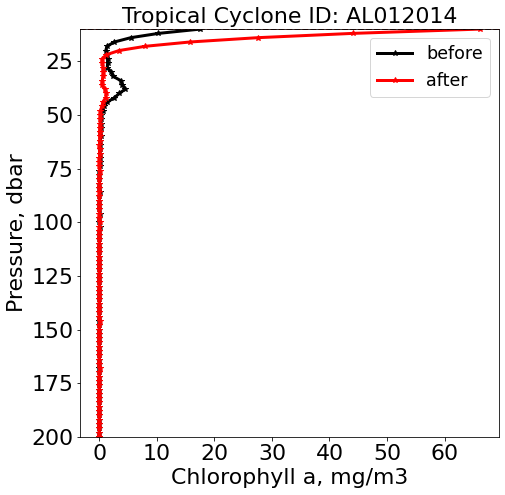

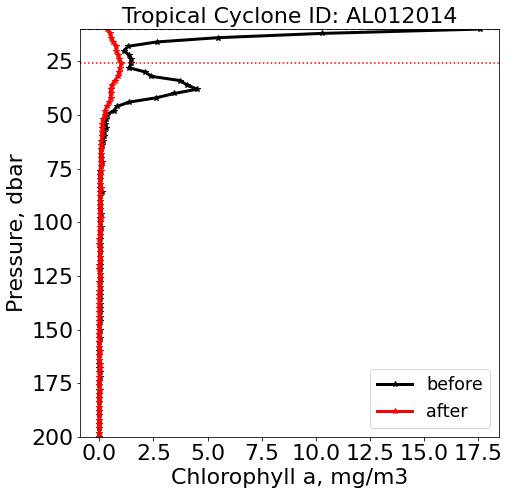

In [23]:
font_size = 22
after_minus_before = []
val_of_max_after   = []
pres_of_max_after  = []
val_of_max_before  = []
pres_of_max_before = []
val_at_shallowest_lev_before = []
val_at_shallowest_lev_after = []
max_val_in_top_10lev_before = []
max_val_in_top_10lev_after  = []

for (b,a,tcID) in zip(raw_before_data,raw_after_data,HurricaneID):
    fig = plt.figure(figsize=(7.5,7.5))
    plt.plot(b,pres,linewidth=3,color='k',marker='*',label='before')
    plt.plot(a,pres,linewidth=3,color='r',marker='*',label='after')
    plt.title("Tropical Cyclone ID: "+tcID,fontsize=font_size)
    plt.gca().set_xlabel(var_lab,fontsize=font_size)
    plt.gca().set_ylabel('Pressure, dbar',fontsize=font_size)
    plt.ylim(pres_lim)
    plt.gca().invert_yaxis()
    plt.legend(fontsize=font_size*.8)
    
    for tick in plt.gca().xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
    for tick in plt.gca().yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
        
    # save and plot the pressure of the max value
    xl = plt.xlim();
    val_of_max_before.append(b.max())
    pres_of_max_before.append(pres[b.argmax()])
    plt.plot(xl,[pres[b.argmax()],pres[b.argmax()]],color='k',linestyle='--')
    
    val_of_max_after.append(a.max())
    pres_of_max_after.append(pres[a.argmax()])
    plt.plot(xl,[pres[a.argmax()],pres[a.argmax()]],color='r',linestyle=':')

    plt.xlim(xl)
    plt.show()
    # save the after-before difference
    after_minus_before.append([a-b])
    val_at_shallowest_lev_before.append(b[0])
    val_at_shallowest_lev_after.append(a[0])
    max_val_in_top_10lev_before.append(max(b[0:9]))
    max_val_in_top_10lev_after.append(max(a[0:9]))

Let's edit the dimensions of the variable "after_minus_before" and create a variable that tells pressure for each point in "after_minus_before".

In [24]:
after_minus_before = np.squeeze(after_minus_before)

# print what the new dimensions are
print(np.shape(after_minus_before))
# create after_minus_before_pres that can tell the pressure for each point in "after_minus_before"
after_minus_before_pres = np.matlib.repmat(pres,np.shape(after_minus_before)[0],1)

(30, 101)


Let's now plot the difference between the profile after versus before

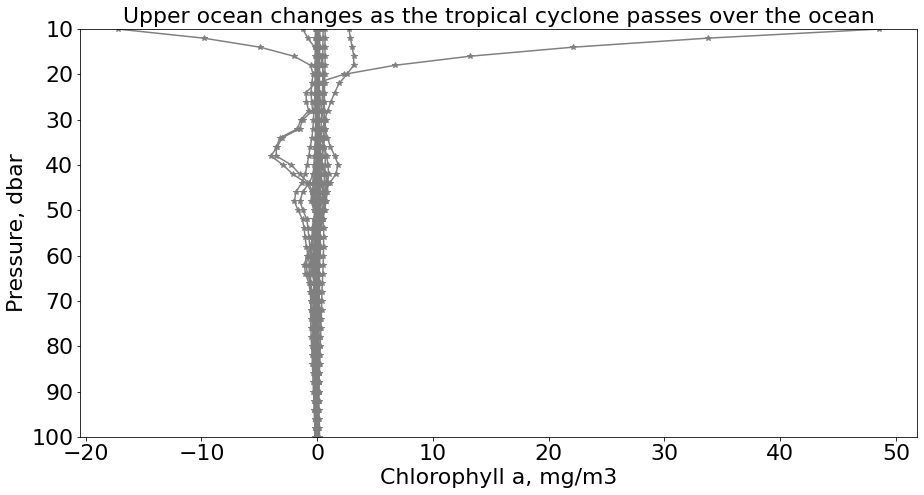

In [25]:
fig = plt.figure(figsize=(15,7.5))
for i in np.arange(0,len(after_minus_before),1):
    plt.plot(after_minus_before[i],pres,marker='*',color='gray')
    
plt.title("Upper ocean changes as the tropical cyclone passes over the ocean",fontsize=font_size)
plt.gca().set_xlabel(var_lab,fontsize=font_size)
plt.gca().set_ylabel('Pressure, dbar',fontsize=font_size)
plt.ylim([10,100])
plt.gca().invert_yaxis()
    
for tick in plt.gca().xaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(font_size) 
for tick in plt.gca().yaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(font_size) 
plt.show()

**Let's make a 2D histogram of the differences, as from the previous plot, it is not very easy to see what happens for most pairs.**

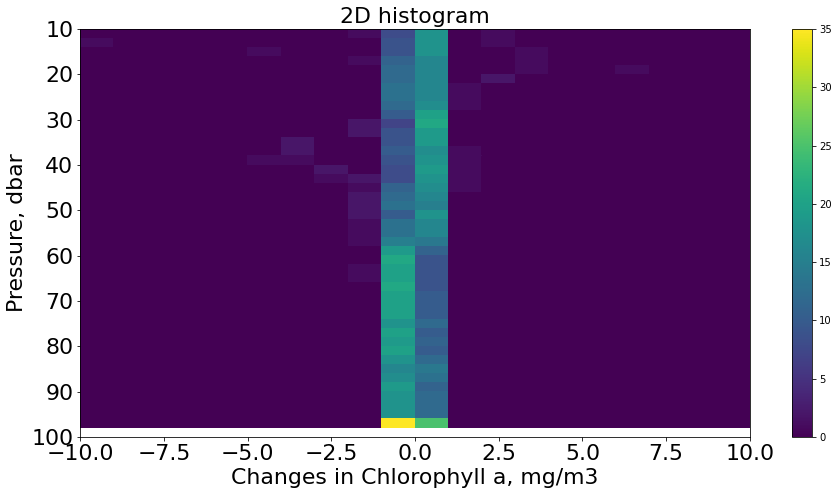

In [26]:
fig = plt.figure(figsize=(15,7.5))
plt.hist2d(after_minus_before.flatten(), after_minus_before_pres.flatten(), bins=(np.arange(-10,11,1),np.arange(10,100,2))) # , norm=LogNorm()
plt.colorbar()
plt.title("2D histogram",fontsize=font_size)
plt.gca().set_xlabel("Changes in "+var_lab,fontsize=font_size)
plt.gca().set_ylabel('Pressure, dbar',fontsize=font_size)
plt.ylim([10,100])
plt.gca().invert_yaxis()
    
for tick in plt.gca().xaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(font_size) 
for tick in plt.gca().yaxis.get_majorticklabels():  # example for xaxis
    tick.set_fontsize(font_size) 
plt.show()

**How can we summarize better what happens? Let's try and use the max value and the pressure at which this max value is found.**

In [27]:
# let's define a function to plot an histogram
def plot_histogram(x,delta_bins,xlab='x',xlim=[],font_size=font_size):
    fig = plt.figure(figsize=(15,7.5))
    bins = np.arange(np.floor(min(x)),np.ceil(max(x)),delta_bins)
    plt.hist(x, bins, alpha=0.5, label=xlab)
    
    plt.gca().set_xlabel(xlab,fontsize=font_size)
    if xlim:
        plt.xlim(xlim)
    for tick in plt.gca().xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
    for tick in plt.gca().yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
    plt.grid()
    plt.show()
# let's define a function to make a versus plot
def plot_versus(x,y,xlab='x',ylab='y',xlim=[]):
    fig = plt.figure(figsize=(15,7.5))
    plt.plot(x,y,marker='*',linestyle='',markersize=10)
    plt.gca().set_xlabel(xlab,fontsize=font_size)
    plt.gca().set_ylabel(ylab,fontsize=font_size)
    if xlim:
        plt.xlim(xlim)
    for tick in plt.gca().xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
    for tick in plt.gca().yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(font_size) 
    plt.grid()
    plt.show()

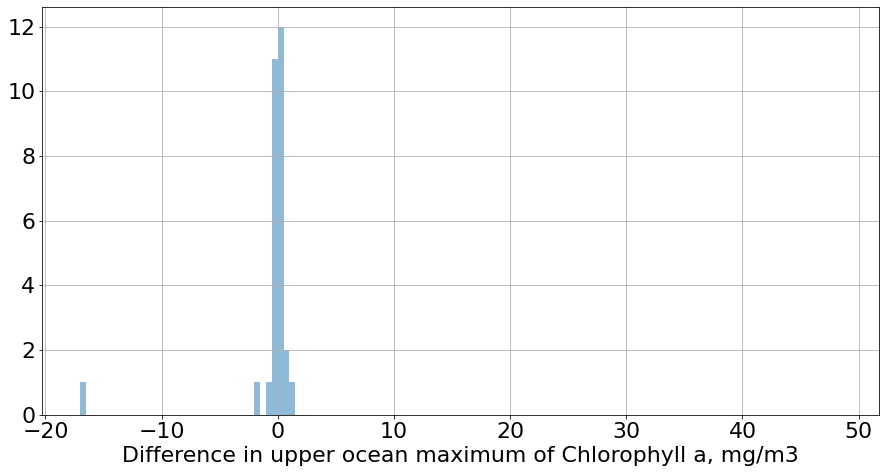

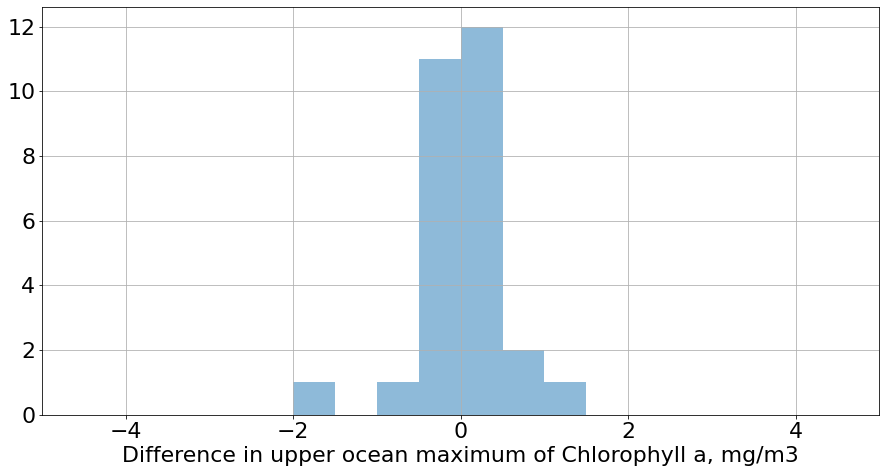

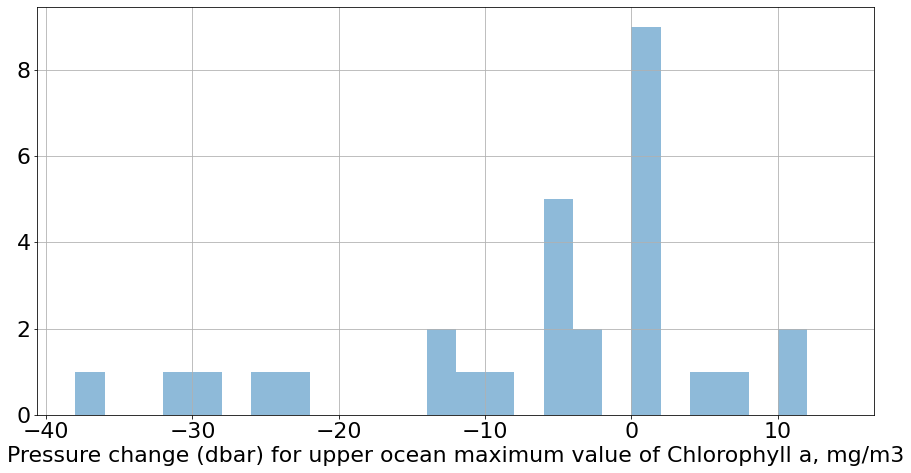

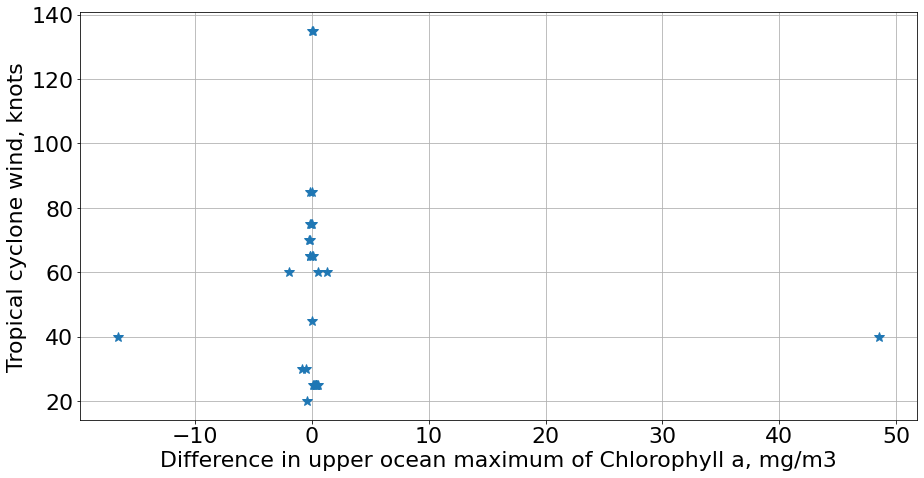

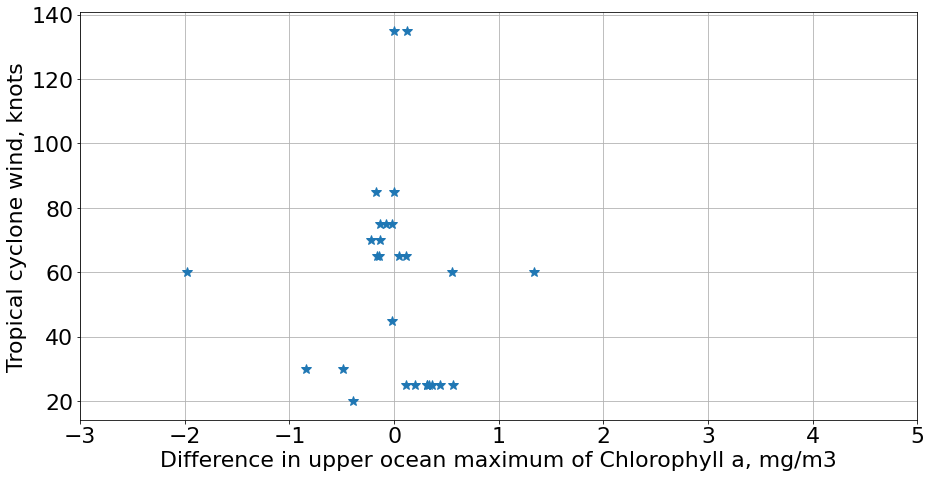

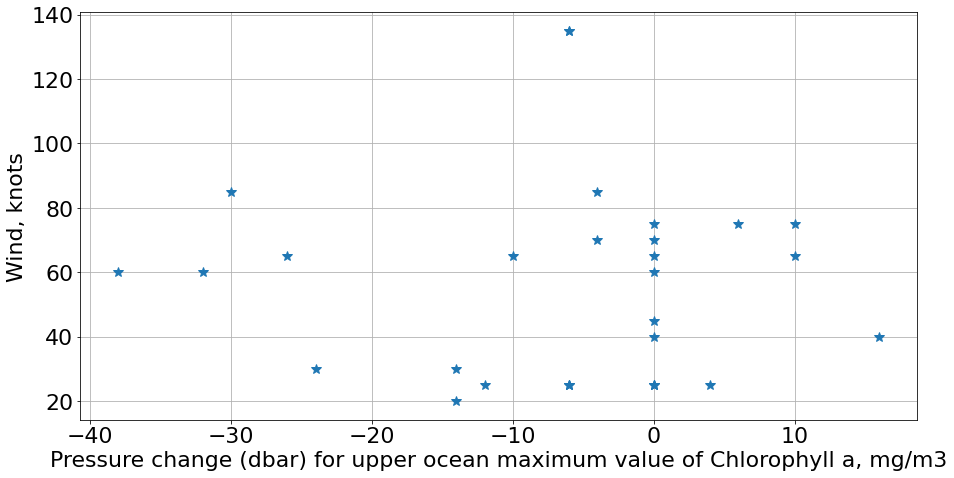

In [28]:
plot_histogram(x=np.array(val_of_max_after)-np.array(val_of_max_before),
               delta_bins=0.5,xlab="Difference in upper ocean maximum of "+var_lab)
plot_histogram(x=np.array(val_of_max_after)-np.array(val_of_max_before),
               delta_bins=0.5,xlab="Difference in upper ocean maximum of "+var_lab,xlim=[-5,5])

plot_histogram(x=np.array(pres_of_max_after)-np.array(pres_of_max_before),
               delta_bins=2,xlab='Pressure change (dbar) for upper ocean maximum value of '+var_lab)

plot_versus(x=np.array(val_of_max_after)-np.array(val_of_max_before),y=TC_wind,
            xlab="Difference in upper ocean maximum of "+var_lab,ylab='Tropical cyclone wind, knots')
plot_versus(x=np.array(val_of_max_after)-np.array(val_of_max_before),y=TC_wind,
            xlab="Difference in upper ocean maximum of "+var_lab,ylab='Tropical cyclone wind, knots',xlim=[-3,5])

plot_versus(x=np.array(pres_of_max_after)-np.array(pres_of_max_before),y=TC_wind,
            xlab='Pressure change (dbar) for upper ocean maximum value of '+var_lab,ylab='Wind, knots')

Suggestions for next steps: 
- edit to save figures with suitable file names
- look at what happens at a level of interest and/or the average in a pressure range and/or max in a pressure range
- use the difference in time between profiles to better understand differences in different pairs?
- look at other variables and data with better QC and see if there are enough profile pairs co-located with TCs?